# Robot-in-a-Corridor: Reinforcement Learning Examples

This notebook demonstrates various reinforcement learning algorithms for corridor navigation.

**🚀 GPU Acceleration:** All algorithms now use PyTorch with automatic GPU acceleration (CUDA/MPS/CPU)!

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from src.environment import Corridor
from src.agent import MonteCarloAgent, QLearningAgent, SARSAAgent, ExpectedSARSAAgent
from src.training import train_monte_carlo, train_td_learning, compare_algorithms
from src.visualization import plot_training_results, plot_algorithm_comparison

In [ ]:
# Check GPU acceleration status
import torch

print(f"PyTorch Version: {torch.__version__}")
print(
    f"GPU Available: {torch.cuda.is_available() or torch.backends.mps.is_available()}"
)
if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")
elif torch.backends.mps.is_available():
    print(f"MPS (Apple Silicon GPU) Available")
print(
    f"Device being used: {'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'}"
)

PyTorch Version: 2.5.1
GPU Available: True
MPS (Apple Silicon GPU) Available
Device being used: mps


## 1. Training with Q-Learning

Q-Learning is an off-policy TD control algorithm that learns the optimal Q-function.

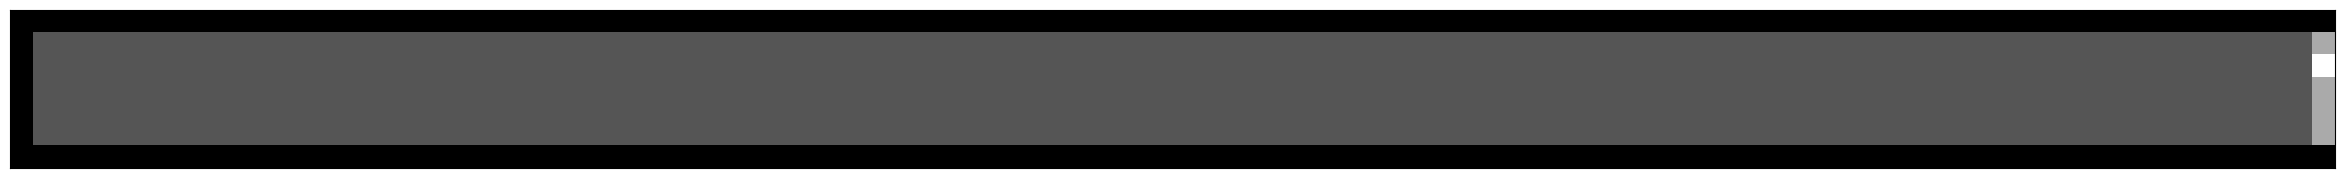

Episode: 1800
Last number of steps: 104
Last total reward: -3
Epsilon: 6.955370674574671e-09


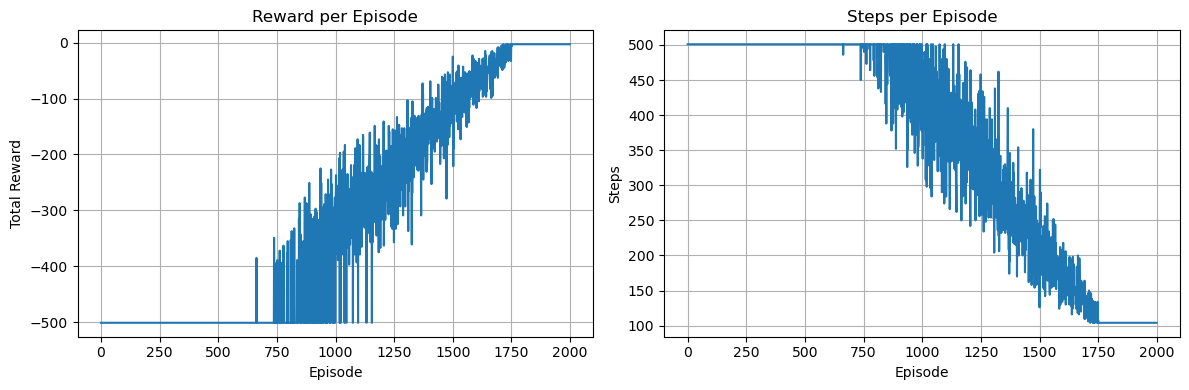

In [33]:
# Create environment and Q-Learning agent
corridor = Corridor(length=100)
q_agent = QLearningAgent(corridor, gamma=0.99, alpha=0.5, epsilon=0.5)

# Train the agent
steps_history, reward_history = train_td_learning(
    corridor, q_agent, n_epochs=2000, max_steps=500, display_interval=200
)

# Plot results
plot_training_results(reward_history, steps_history)

## 2. Training with SARSA

SARSA is an on-policy TD control algorithm that learns the Q-function of the current policy.

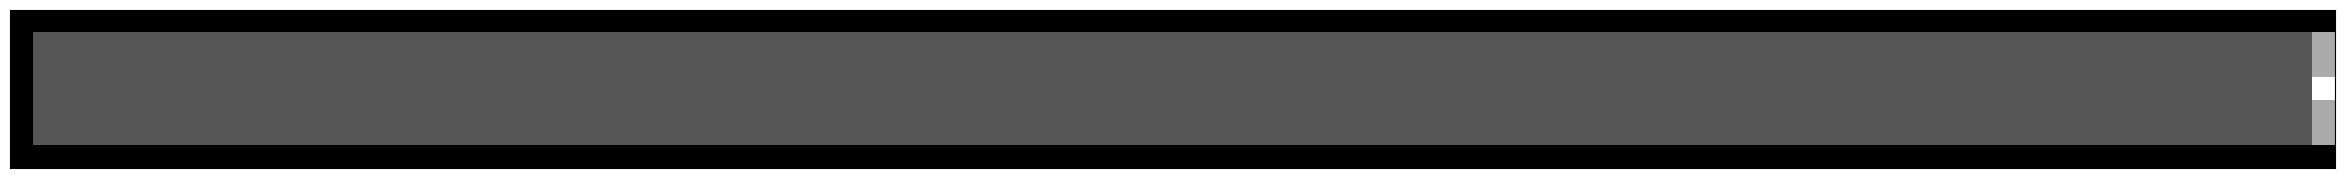

Episode: 1800
Last number of steps: 103
Last total reward: -2
Epsilon: 6.955370674574671e-09


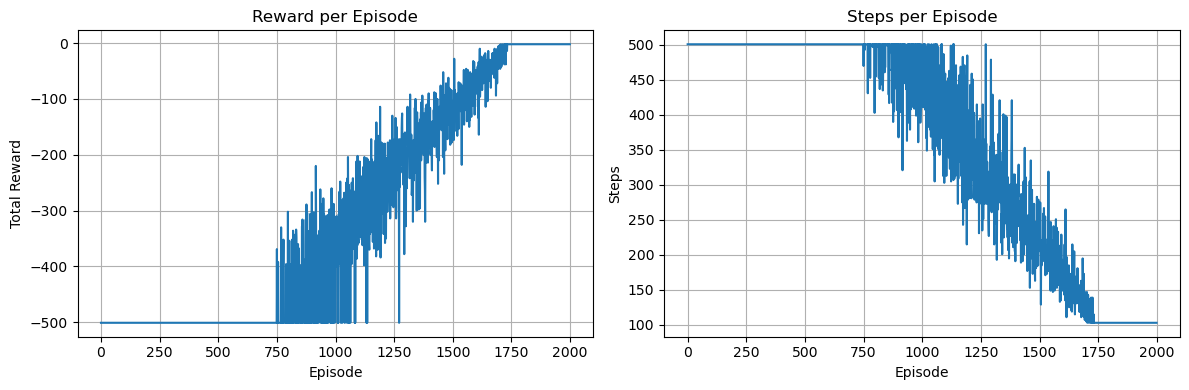

In [34]:
# Create environment and SARSA agent
corridor = Corridor(length=100)
sarsa_agent = SARSAAgent(corridor, gamma=0.99, alpha=0.5, epsilon=0.5)

# Train the agent
steps_history, reward_history = train_td_learning(
    corridor, sarsa_agent, n_epochs=2000, max_steps=500, display_interval=200
)

# Plot results
plot_training_results(reward_history, steps_history)

## 3. Training with Expected SARSA

Expected SARSA is a more stable variant that uses the expected value under the current policy.

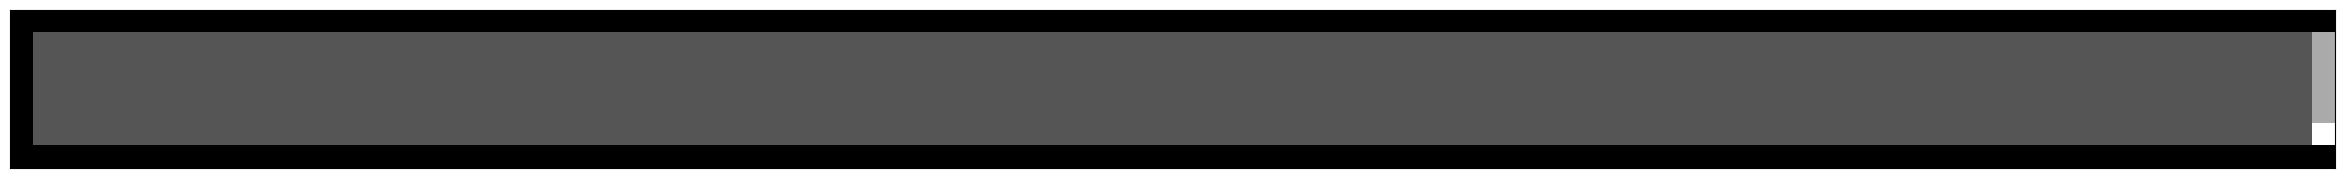

Episode: 1800
Last number of steps: 105
Last total reward: -4
Epsilon: 6.955370674574671e-09


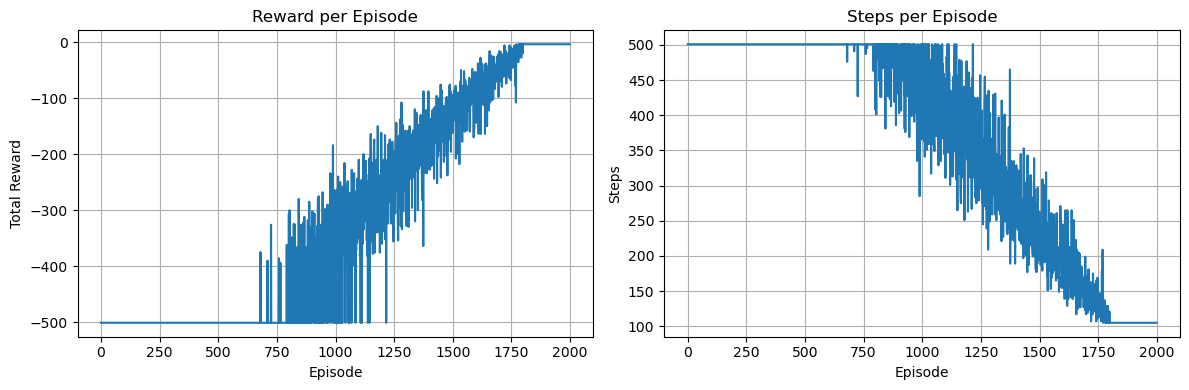

In [35]:
# Create environment and Expected SARSA agent
corridor = Corridor(length=100)
expected_sarsa_agent = ExpectedSARSAAgent(corridor, gamma=0.99, alpha=0.5, epsilon=0.5)

# Train the agent
steps_history, reward_history = train_td_learning(
    corridor, expected_sarsa_agent, n_epochs=2000, max_steps=500, display_interval=200
)

# Plot results
plot_training_results(reward_history, steps_history)

## 4. Training with Monte Carlo

Monte Carlo methods wait until the end of an episode to update values.

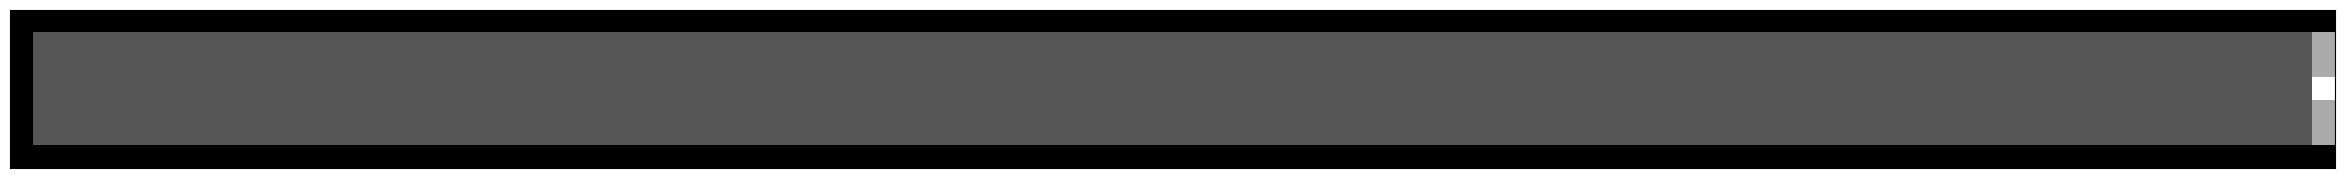

Episode: 1800
Last number of steps: 101
Last total reward: 0
Epsilon: 4.1732224047447925e-09


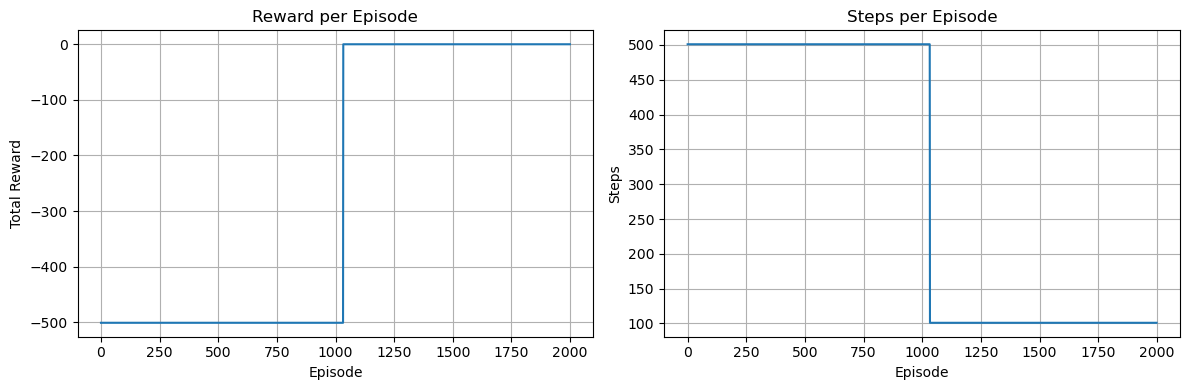

In [36]:
# Create environment and Monte Carlo agent
corridor = Corridor(length=100)
mc_agent = MonteCarloAgent(corridor, gamma=0.9, alpha=0.5, epsilon=0.3)

# Train the agent
steps_history, reward_history = train_monte_carlo(
    corridor, mc_agent, n_epochs=2000, max_steps=500, display_interval=200
)

# Plot results
plot_training_results(reward_history, steps_history)

## 5. Algorithm Comparison

Let's compare all algorithms side-by-side over multiple runs.

In [37]:
# Define algorithms to compare
algorithms = {
    "Q-Learning": QLearningAgent,
    "SARSA": SARSAAgent,
    "Expected SARSA": ExpectedSARSAAgent,
    "Monte Carlo": MonteCarloAgent,
}

agent_config = {
    "Q-Learning": {"gamma": 0.99, "alpha": 0.5, "epsilon": 0.5},
    "SARSA": {"gamma": 0.99, "alpha": 0.5, "epsilon": 0.5},
    "Expected SARSA": {"gamma": 0.99, "alpha": 0.5, "epsilon": 0.5},
    "Monte Carlo": {"gamma": 0.9, "alpha": 0.5, "epsilon": 0.3},
    # Common parameters can be set here; adjust as needed
}

# Run comparison
results = compare_algorithms(
    env_config={"length": 100, "width": 5},
    algorithms=algorithms,
    agent_config=agent_config,
    n_epochs=2000,
    max_steps=500,
    n_runs=5,
)


Training Q-Learning...
  Run 1/5: Final avg reward = -3.00
  Run 1/5: Final avg reward = -3.00
  Run 2/5: Final avg reward = 0.00
  Run 2/5: Final avg reward = 0.00
  Run 3/5: Final avg reward = -3.00
  Run 3/5: Final avg reward = -3.00
  Run 4/5: Final avg reward = -4.00
  Run 4/5: Final avg reward = -4.00
  Run 5/5: Final avg reward = -4.00

Training SARSA...
  Run 5/5: Final avg reward = -4.00

Training SARSA...
  Run 1/5: Final avg reward = -5.00
  Run 1/5: Final avg reward = -5.00
  Run 2/5: Final avg reward = -3.00
  Run 2/5: Final avg reward = -3.00
  Run 3/5: Final avg reward = -4.00
  Run 3/5: Final avg reward = -4.00
  Run 4/5: Final avg reward = 0.00
  Run 4/5: Final avg reward = 0.00
  Run 5/5: Final avg reward = -3.00

Training Expected SARSA...
  Run 5/5: Final avg reward = -3.00

Training Expected SARSA...
  Run 1/5: Final avg reward = -6.00
  Run 1/5: Final avg reward = -6.00
  Run 2/5: Final avg reward = -3.00
  Run 2/5: Final avg reward = -3.00
  Run 3/5: Final avg r

### Visualize Comparison Results

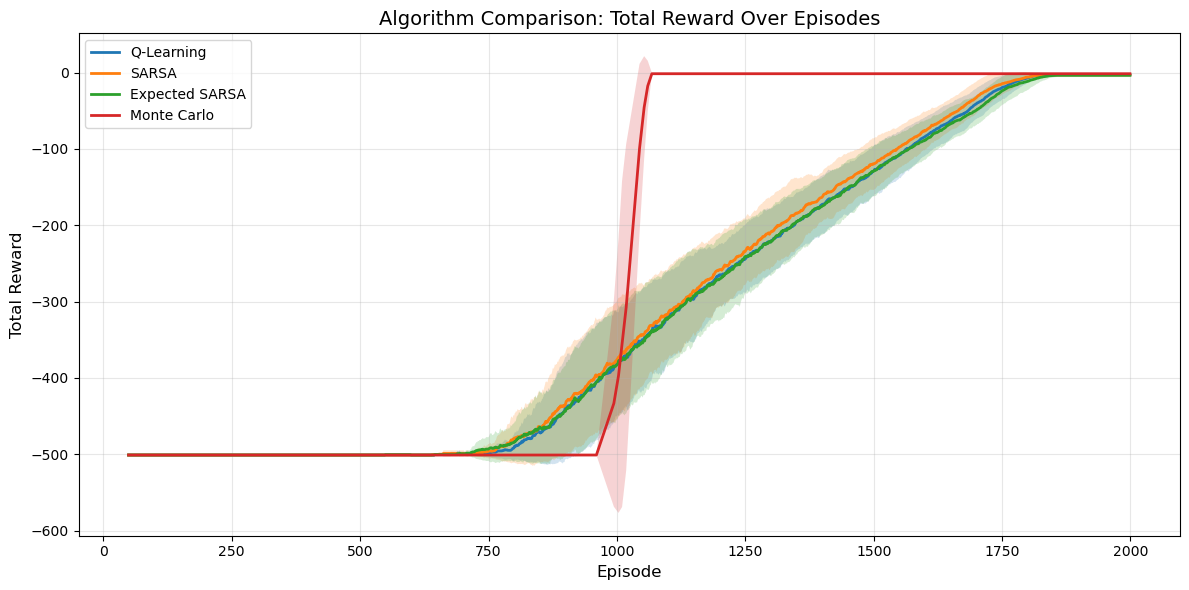


Final Performance (last 100 episodes average):
------------------------------------------------------------
Q-Learning          :    -2.80 ±   1.47
SARSA               :    -3.00 ±   1.67
Expected SARSA      :    -3.40 ±   2.33
Monte Carlo         :    -1.40 ±   1.20
------------------------------------------------------------


In [38]:
# Plot reward comparison
plot_algorithm_comparison(results, metric="rewards", window=50)

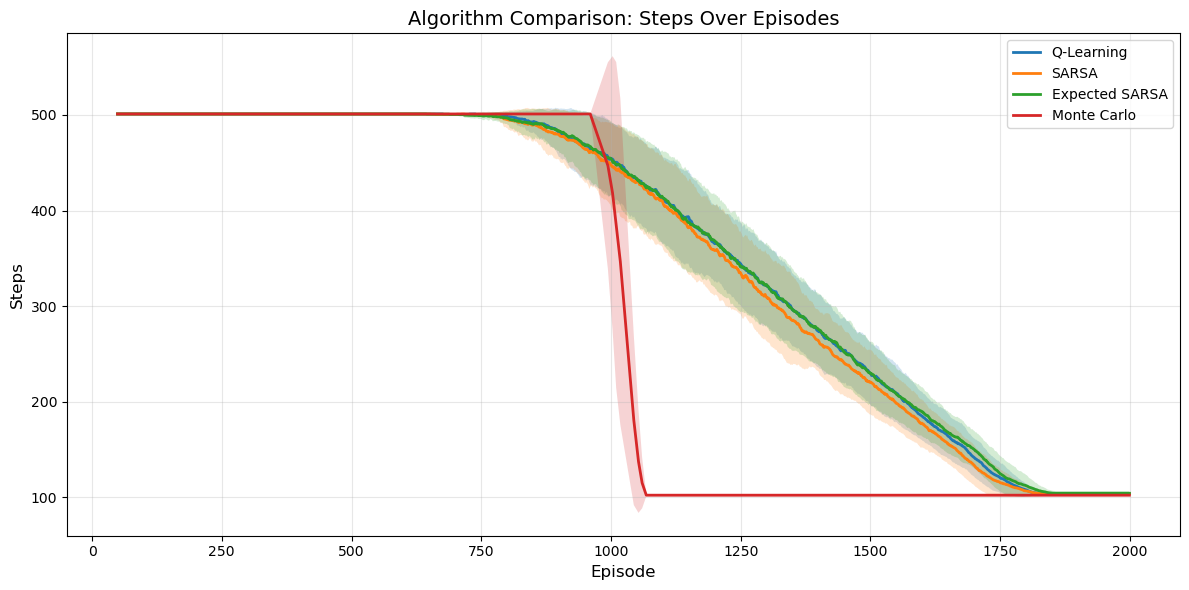


Final Performance (last 100 episodes average):
------------------------------------------------------------
Q-Learning          :    -2.80 ±   1.47
SARSA               :    -3.00 ±   1.67
Expected SARSA      :    -3.40 ±   2.33
Monte Carlo         :    -1.40 ±   1.20
------------------------------------------------------------


In [39]:
# Plot steps comparison
plot_algorithm_comparison(results, metric="steps", window=50)

## 6. Test Trained Agent

Let's visualize a trained agent navigating the corridor.

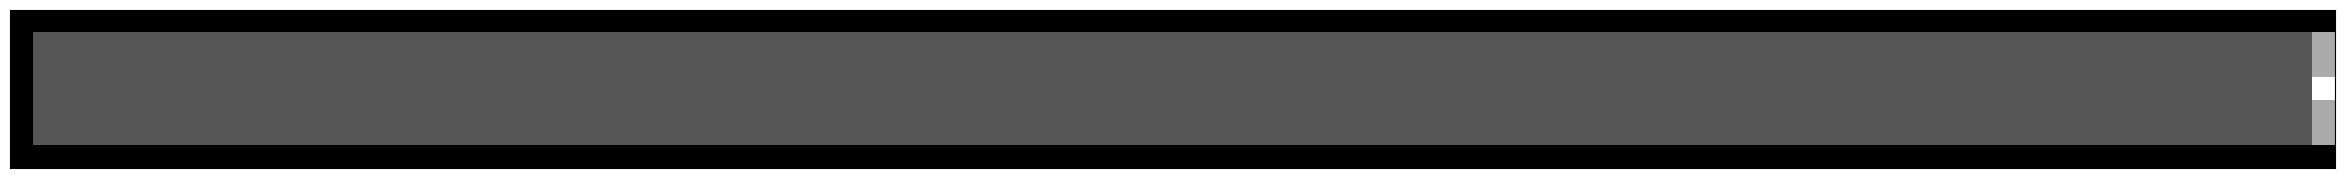

GIF saved to images/q_learning_robot.gif (104 frames)


104

In [40]:
from src.visualization import generate_episode_gif

# Use the best performing algorithm (typically Q-Learning or Expected SARSA)
corridor = Corridor(length=100)
agent = QLearningAgent(corridor, gamma=0.99, alpha=0.5, epsilon=0.5)

# Train
print("Training agent...")
train_td_learning(corridor, agent, n_epochs=2000, max_steps=500)

# Generate GIF
print("Generating GIF...")
generate_episode_gif(
    corridor=corridor,
    agent=agent,
    output_path="images/q_learning_robot.gif",
    show_frames=True,
    frame_interval=100,
    dpi=300,
)

## 7. Hyperparameter Exploration

Compare different learning rates and discount factors.


Testing learning rate: 0.1

Testing learning rate: 0.5

Testing learning rate: 0.5

Testing learning rate: 0.9

Testing learning rate: 0.9

Testing learning rate: 1.0

Testing learning rate: 1.0

Testing learning rate: 1.5

Testing learning rate: 1.5


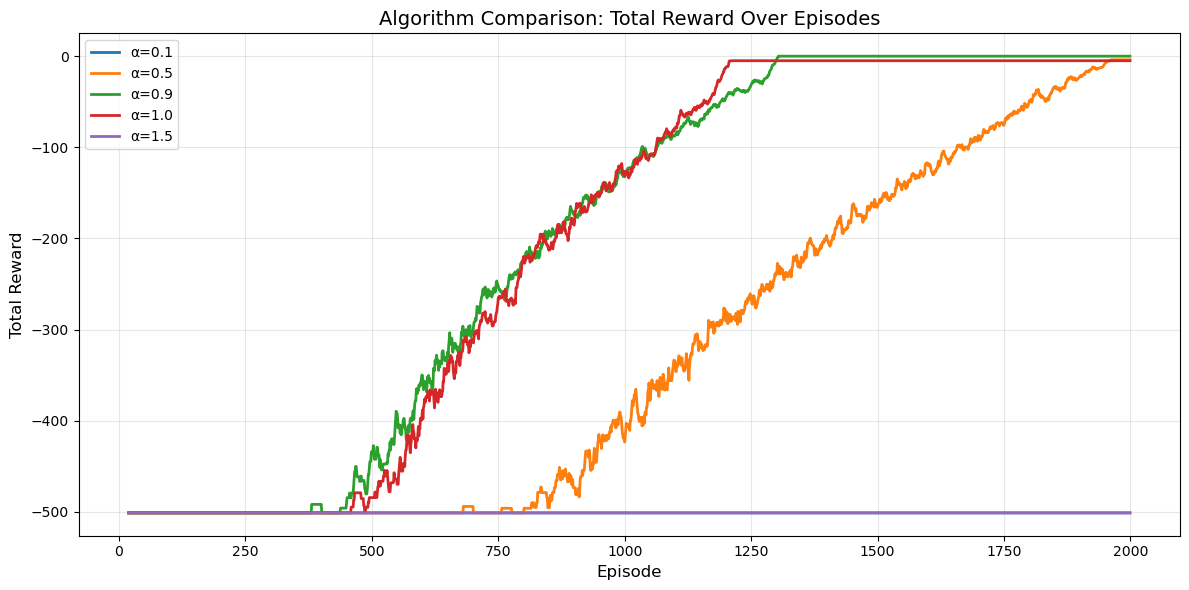


Final Performance (last 100 episodes average):
------------------------------------------------------------
α=0.1               :  -501.00 ±   0.00
α=0.5               :    -8.48 ±   0.00
α=0.9               :     0.00 ±   0.00
α=1.0               :    -5.00 ±   0.00
α=1.5               :  -501.00 ±   0.00
------------------------------------------------------------


In [41]:
# Compare different learning rates for Q-Learning
learning_rates = [0.1, 0.5, 0.9, 1.0, 1.5]
lr_results = {}

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    corridor = Corridor(length=100)
    agent = QLearningAgent(corridor, gamma=0.9, alpha=lr, epsilon=0.5)
    steps, rewards = train_td_learning(corridor, agent, n_epochs=2000, max_steps=500)
    lr_results[f"α={lr}"] = {
        "mean_rewards": rewards,
        "std_rewards": np.zeros_like(rewards),
        "mean_steps": steps,
        "std_steps": np.zeros_like(steps),
        "final_performance_mean": np.mean(rewards[-100:]),
        "final_performance_std": 0,
    }

# Plot comparison
plot_algorithm_comparison(lr_results, metric="rewards", window=20)